In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (60000, 28, 28)
Training labels shape:  (60000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)


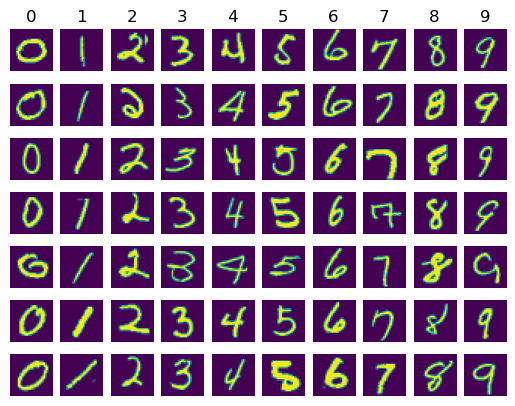

In [3]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)

In [10]:
# Subsample the data for more efficient code execution in this exercise
num_training = 41000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask].T

num_test = 1000
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows, transpose and normalize
X_train = np.reshape(X_train, (X_train.shape[0], -1)).T / 255.
X_test = np.reshape(X_test, (X_test.shape[0], -1)).T / 255.
print(X_train.shape, X_test.shape)

(784, 41000) (784, 1000)


In [11]:
class NN:
    
    def __init__(self, sizes, lr=0.1, max_iter=500):
        self.sizes = sizes        
        self.lr = lr
        self.max_iter = max_iter

    def init_params(self, X, y):
        input_layer = self.sizes[0]
        hidden_layer = self.sizes[1]
        output_layer = self.sizes[2]
        W1 = np.random.rand(hidden_layer, input_layer)*np.sqrt(1./input_layer)
        b1 = np.random.rand(hidden_layer, 1)
        W2 = np.random.rand(output_layer, hidden_layer)*np.sqrt(1./hidden_layer)
        b2 = np.random.rand(output_layer, 1)                  
        return W1, b1, W2, b2

    def ReLU(self, Z):
        return np.maximum(Z, 0)

    #def softmax(self, Z):
     #   A = np.exp(Z) / np.sum(np.exp(Z))
      #  return A

    def softmax(self, Z):
        exps = np.exp(Z - Z.max())
        return exps / np.sum(exps, axis=0)

    def sigmoid(self, y):
        return 1./(1. - np.exp(-y))

    def deriv_sigmoid(self, out):
        return out*(1.0 - out)

    def deriv_ReLU(self, Z):
        return np.where(Z <= 0, 0, 1)
  
    def forward_prop(self, X, W1, b1, W2, b2):
        # Input to layer 1
        Z1 = W1@X + b1
        # Output 1
        O1 = self.ReLU(Z1) 
        # Layer 1 to layer 2
        Z2 = W2@O1 + b2  
        # Output
        O2 = self.softmax(Z2) 
        return Z1, O1, Z2, O2      
    
    def back_prop(self, X, y, Z1, O1, W1, Z2, O2, W2):
        dZ2 = O2 - to_categorical(y).T        
        n = O1.shape[1]
        dW2 = (1/n)*dZ2@O1.T   
        db2 = (1/n)*np.sum(dZ2)
        dZ1 = (W2.T@dZ2)*self.deriv_ReLU(Z1)    
        dW1 = (1/n)*(dZ1@X.T)
        db1 = (1/n)*np.sum(dZ1)   
        return dW1, db1, dW2, db2

    def fit(self, X, y):
        # Initialize parameters
        W1, b1, W2, b2 = self.init_params(X, y)
        for i in range(self.max_iter):
            Z1, O1, Z2, O2 = self.forward_prop(X, W1, b1, W2, b2)
            # Gradients
            dW1, db1, dW2, db2 = self.back_prop(X, y, Z1, O1, W1, Z2, O2, W2)
            # Update parameters
            W1 = W1 - self.lr*dW1
            W2 = W2 - self.lr*dW2
            b1 = b1 - self.lr*db1
            b2 = b2 - self.lr*db2            
            if i % 100 == 0:
                print("Iteration: ", i)
        return W1, b1, W2, b2

    def predict(self, X, W1, b1, W2, b2):
        _, _, _, output = self.forward_prop(X, W1, b1, W2, b2)       
        return np.argmax(output, 0)

In [13]:
clf = NN(sizes=[784, 10, 10])
W1, b1, W2, b2 = clf.fit(X_train, y_train)

Iteration:  0
Iteration:  100
Iteration:  200
Iteration:  300
Iteration:  400


In [8]:
index = 100
test_number = X_test[:, index, None]
test_number_true_label = y_test[index]
prediction = clf.predict(test_number, W1, b1, W2, b2)
print("Prediction: ", prediction)
print("Label: ", test_number_true_label)

test_image = test_number.reshape((28, 28))*255
plt.gray()
plt.imshow(test_image, interpolation='nearest')
plt.show()

IndexError: index 100 is out of bounds for axis 1 with size 28